In [2]:
from facenet_pytorch import MTCNN, InceptionResnetV1

# mtcnn = MTCNN(image_size=, margin=)

resnet = InceptionResnetV1(pretrained='vggface2').eval()

  0%|          | 0.00/107M [00:00<?, ?B/s]

In [7]:
from facenet_pytorch import MTCNN
from PIL import Image
import torch

# Initialize MTCNN with optional parameters
detector = MTCNN(keep_all=True, device='cuda' if torch.cuda.is_available() else 'cpu')

# Load an image
image = Image.open('./taylor_swift.jpg').convert('RGB')

# Detect faces using MTCNN
# The facenet-pytorch MTCNN returns boxes, probs, and landmarks
boxes, probs, landmarks = detector.detect(image, landmarks=True)

# If you want to visualize or work with the detected faces
if boxes is not None:
    print(f"Found {len(boxes)} faces in the image!")
    for i, box in enumerate(boxes):
        print(f"Face {i+1} coordinates:", box)
        print(f"Detection probability:", probs[i])

Found 3 faces in the image!
Face 1 coordinates: [501.952880859375 504.8398132324219 1489.0723876953125 1849.4052734375]
Detection probability: 0.9839805364608765
Face 2 coordinates: [1562.65283203125 2640.6455078125 1656.960205078125 2767.539794921875]
Detection probability: 0.7260475754737854
Face 3 coordinates: [1450.9324951171875 2209.576904296875 1500.2825927734375 2271.36669921875]
Detection probability: 0.7292989492416382


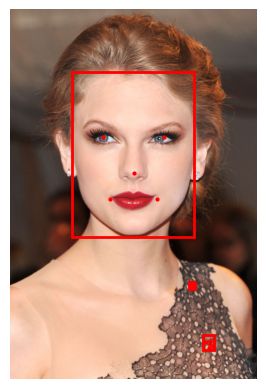

In [13]:
from facenet_pytorch import MTCNN
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import torch

detector = MTCNN(keep_all=True, device='cuda' if torch.cuda.is_available() else 'cpu')

image = Image.open('./taylor_swift.jpg').convert('RGB')
img_array = np.array(image)

boxes, probs, landmarks = detector.detect(image, landmarks=True)

fig, ax = plt.subplots(1)
ax.imshow(img_array)

if boxes is not None:
    for box, landmark in zip(boxes, landmarks):
        rect = patches.Rectangle(
            (box[0], box[1]), box[2]-box[0], box[3]-box[1],
            linewidth=2, edgecolor='r', facecolor='none'
        )
        ax.add_patch(rect)
        
        for dot in landmark:
            ax.plot(dot[0], dot[1], 'ro', markersize=2)

plt.axis('off')
plt.show()

In [14]:
from facenet_pytorch import MTCNN, InceptionResnetV1
from PIL import Image
import torch

mtcnn = MTCNN(image_size=160, margin=20, keep_all=False)
facenet = InceptionResnetV1(pretrained='vggface2').eval()

image = Image.open('./taylor_swift.jpg').convert('RGB')

face_tensor = mtcnn(image)

if face_tensor is not None:
    face_tensor = face_tensor.unsqueeze(0)
    with torch.no_grad():
        embedding = facenet(face_tensor)
    print("Embedding:", embedding)
else:
    print("No face detected.")

Embedding: tensor([[ 3.5392e-02, -1.8841e-02,  1.2037e-02, -2.4560e-02,  2.0954e-02,
          4.4716e-02, -5.0716e-02,  2.4798e-02, -1.0360e-02,  9.2528e-03,
          6.2054e-02,  5.0009e-02,  2.2604e-02, -1.7543e-02, -1.5601e-02,
         -1.8068e-02, -2.7915e-02, -4.2387e-02,  3.5329e-02, -3.1969e-02,
         -4.0143e-02, -8.8793e-03,  7.3725e-02, -2.3003e-02,  2.9700e-02,
         -4.1527e-02, -1.1892e-02, -1.6991e-02,  4.3112e-02, -3.1221e-03,
          1.1132e-02, -2.4451e-02, -1.5962e-03,  2.2625e-02,  1.8370e-02,
          2.6158e-03, -1.6671e-02, -2.6392e-02, -1.2959e-02, -1.1203e-02,
          8.0496e-02,  1.5519e-03, -5.9944e-03,  5.7579e-02, -4.0182e-02,
          1.9849e-02, -6.9674e-02, -1.5584e-02, -1.1595e-02, -4.5810e-02,
         -7.7596e-02, -5.1542e-02,  5.1406e-02,  5.6108e-02, -1.8552e-02,
          5.9005e-02,  4.0298e-02,  1.1683e-02, -2.5880e-02, -4.4942e-02,
          2.9272e-02,  4.9625e-02, -5.6240e-02,  7.5322e-02,  1.1339e-01,
         -2.0903e-02, -1.69

In [4]:
!pip install --quiet --upgrade sentence-transformers pymongo einops


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [5]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("nomic-ai/nomic-embed-text-v1", trust_remote_code=True)
# Define a function to generate embeddings
def get_embedding(data, precision="float32"):
   return model.encode(data, precision=precision).tolist()
# Generate an embedding
embedding = get_embedding("foo")
print(embedding)

ModuleNotFoundError: No module named 'sentence_transformers'

In [6]:
# Sample data
texts = [
  "Titanic: The story of the 1912 sinking of the largest luxury liner ever built",
  "The Lion King: Lion cub and future king Simba searches for his identity",
  "Avatar: A marine is dispatched to the moon Pandora on a unique mission"
]

In [ ]:
embeddings = []
for text in texts:
 embedding = get_embedding(text)

